In [3]:
import pandas as pd 
import numpy as np

In [4]:
#获得特征矩阵和标签矩阵
def get_Mat(path):
    dataSet = pd.read_table(path,header = None)
    xMat = np.mat(dataSet.iloc[:,:-1].values) #前两个作为X
    yMat = np.mat(dataSet.iloc[:,-1].values).T #最后一个作为Y
    return xMat,yMat

In [5]:
xMat,yMat = get_Mat('simpdata.txt')

In [6]:
xMat

matrix([[1. , 2.1],
        [1.5, 1.6],
        [1.3, 1. ],
        [1. , 1. ],
        [2. , 1. ]])

In [7]:
yMat

matrix([[ 1.],
        [ 1.],
        [-1.],
        [-1.],
        [ 1.]])

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['simhei']#为了显示中文
%matplotlib inline

In [9]:
#数据集可视化函数
def  showPlot(xMat,yMat):
    x = np.array(xMat[:,0])#第一列，横坐标
    y = np.array(xMat[:,1])#第二列纵坐标
    label = np.array(yMat)#标签
    plt.scatter(x,y,c= label)
    plt.title("单层决策树测试数据")
    plt.show()

In [10]:
xMat[:,0]#第一列

matrix([[1. ],
        [1.5],
        [1.3],
        [1. ],
        [2. ]])

In [11]:
xMat[:,1]#第二列

matrix([[2.1],
        [1.6],
        [1. ],
        [1. ],
        [1. ]])

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/hhl/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hhl/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23618 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hhl/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20915 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hhl/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 31574 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hhl/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26641 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/hhl/anaconda3/lib

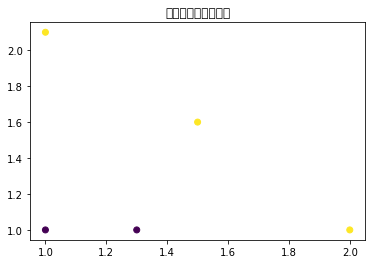

In [12]:
showPlot(xMat,yMat) #这两个函数的数据有问题，先不运行

In [13]:
"""
函数功能：单层决策树分类函数
参数说明：
xMat:数据矩阵
i:第i列，也就是第几个特征
Q:阙值
S:标志
返回：
re:分类结果
"""
def Classify0(xMat,i,Q,S):
    re = np.ones((xMat.shape[0],1))#初始化re为1
    if S =='lt':
        re[xMat[:,i]<=Q] = -1
        #如果小于阙值，则赋值为-1
    else:
        re[xMat[:,i]>Q] = -1
        #如果大于阙值，则赋值为-1
    return re 

In [14]:
np.ones((xMat.shape[0],1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [15]:
"""
函数功能： 找到数据集上最佳的单层决策树
参数说明：
xMat：特征矩阵
yMat:标签矩阵
D:样本权重
返回：
bestStump:最佳单层决策树信息
minE：最小误差
bestClas:最佳分类结果
"""
def get_Stump(xMat,yMat,D):#xMat 特征矩阵，yMat标签矩阵，D 样本权重
    m,n = xMat.shape # m为样本个数5，n为特征数2(5, 2)
    Steps = 10 #初始化一个步数
    bestStump = {} # 用字典形式来储存树桩信息
    bestClas = np.mat(np.zeros((m,1)))#初始化分类结果为1
    minE = np.inf # 最小误差初始化为正无穷大inf 代表无穷大
    for i in range(n):# 遍历所有特征
        Min = xMat[:,i].min() # 找到特征中最小值
        Max = xMat[:,i].max() # 找到特征中最大值
        stepSize = (Max - Min)/Steps # 计算步长
        print(stepSize)
        for j in range (-1, int(Steps)+1):#步数的作用？
            for S in ['lt','gt']:#大于和小于的情况均遍历。lt:less than,gt:greater than
                Q = (Min+j*stepSize)#计算阙值 阙值的作用
                print(Q)
                re = Classify0(xMat,i,Q,S)   #计算分类结果 （调用这个函数是为了进行分类，但分类结果可能不正确，需要后面验证）
                err = np.mat(np.ones((m,1))) #这是个误差矩阵
                err[re == yMat]=0 #分类正确的，赋值
                eca = D.T*err #计算误差 利用权重*误差得到分类器的误差
                print(f'切分特征:{i},阙值：{np.round(Q,2)},标志：{S},权重误差：{np.round(eca,3)}')
                if eca < minE:#找到最小的误差方式
                    minE = eca
                    bestClas = re.copy()
                    bestStump['特征列'] = i
                    bestStump['阙值'] = Q
                    bestStump['标志'] = S
    return  bestStump,minE,bestClas

In [16]:
xMat.shape 

(5, 2)

In [17]:
np.mat(np.zeros((5,1)))

matrix([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [18]:
np.inf 

inf

In [19]:
range (-1, int(10)+1)

range(-1, 11)

In [20]:
m=5
np.mat(np.ones((m,1)))

matrix([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [22]:
m = xMat.shape[0]
D =np.mat(np.ones((m,1))/m)
#初始化样本权重（每个样本权重相等）
bestStump,minE,bestClas = get_Stump(xMat,yMat,D)

In [23]:
bestStump

{}

In [24]:
minE

inf

In [25]:
bestClas

matrix([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])